# 🎬 Análise Exploratória - Camada RAW (Bronze)

## Objetivo do Projeto
**Analisar o desempenho comercial e características dos filmes para identificar padrões de sucesso e tendências da indústria cinematográfica**

---

## Sobre a Camada RAW
A camada RAW (Bronze) contém os dados brutos sem transformações. Nesta análise vamos:
1. Explorar a estrutura de cada dataset
2. Identificar qualidade dos dados (nulos, duplicatas, inconsistências)
3. Realizar análises estatísticas descritivas
4. Criar visualizações iniciais
5. Definir próximos passos para a camada Silver

In [57]:
# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
from pathlib import Path

# Configurações
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Configuração de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Bibliotecas importadas com sucesso!")

✅ Bibliotecas importadas com sucesso!


In [58]:
# Definir caminhos dos arquivos
base_path = Path(r'c:\Users\Lenovo\Documents\Pedro\Bancos2\projeto-bancos-dados-2\Data Layer\raw\dados_brutos')

files = {
    'movies': base_path / 'movies_metadata.csv',
    'credits': base_path / 'credits.csv',
    'keywords': base_path / 'keywords.csv',
    'links': base_path / 'links.csv',
    'ratings': base_path / 'ratings.csv'
}

# Verificar se os arquivos existem
for name, path in files.items():
    if path.exists():
        print(f"✅ {name}: {path.name}")
    else:
        print(f"❌ {name}: Arquivo não encontrado!")

✅ movies: movies_metadata.csv
✅ credits: credits.csv
✅ keywords: keywords.csv
✅ links: links.csv
✅ ratings: ratings.csv


In [59]:
# Funções auxiliares para análise exploratória
def analyze_dataframe(df, name):
    """Análise completa de um DataFrame"""
    print(f"\n{'='*80}")
    print(f"📊 ANÁLISE: {name}")
    print(f"{'='*80}\n")
    
    # Informações gerais
    print(f"🔢 Dimensões: {df.shape[0]:,} linhas x {df.shape[1]} colunas")
    print(f"💾 Memória utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB\n")
    
    # Tipos de dados
    print("📋 Tipos de dados:")
    print(df.dtypes.value_counts())
    print()
    
    # Valores nulos
    null_counts = df.isnull().sum()
    null_pct = (null_counts / len(df) * 100).round(2)
    null_df = pd.DataFrame({
        'Nulos': null_counts,
        'Percentual': null_pct
    })
    null_df = null_df[null_df['Nulos'] > 0].sort_values('Nulos', ascending=False)
    
    if len(null_df) > 0:
        print("⚠️  Valores nulos encontrados:")
        print(null_df)
    else:
        print("✅ Nenhum valor nulo encontrado!")
    print()
    
    # Duplicatas
    duplicates = df.duplicated().sum()
    print(f"🔄 Linhas duplicadas: {duplicates:,} ({duplicates/len(df)*100:.2f}%)\n")
    
    return null_df

def plot_null_analysis(df, title):
    """Visualizar análise de valores nulos"""
    null_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
    null_pct = null_pct[null_pct > 0]
    
    if len(null_pct) > 0:
        fig, ax = plt.subplots(figsize=(12, 6))
        null_pct.plot(kind='barh', ax=ax, color='salmon')
        ax.set_xlabel('Percentual de Valores Nulos (%)')
        ax.set_title(f'Valores Nulos - {title}')
        ax.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print(f"✅ Nenhum valor nulo em {title}")

print("✅ Funções auxiliares definidas!")

✅ Funções auxiliares definidas!


---
## 1️⃣ Análise: Movies Metadata
Dataset principal contendo informações detalhadas sobre os filmes.

In [60]:
# Carregar dados de filmes
movies_df = pd.read_csv(files['movies'], low_memory=False)

# Análise geral
analyze_dataframe(movies_df, "MOVIES METADATA")

# Primeiras linhas
print("📄 Primeiras 5 linhas:")
movies_df.head()


📊 ANÁLISE: MOVIES METADATA

🔢 Dimensões: 45,466 linhas x 24 colunas
💾 Memória utilizada: 74.66 MB

📋 Tipos de dados:
object     20
float64     4
Name: count, dtype: int64

⚠️  Valores nulos encontrados:
                       Nulos  Percentual
belongs_to_collection  40972       90.12
homepage               37684       82.88
tagline                25054       55.10
overview                 954        2.10
poster_path              386        0.85
runtime                  263        0.58
release_date              87        0.19
status                    87        0.19
imdb_id                   17        0.04
original_language         11        0.02
revenue                    6        0.01
title                      6        0.01
video                      6        0.01
vote_average               6        0.01
spoken_languages           6        0.01
vote_count                 6        0.01
popularity                 5        0.01
production_companies       3        0.01
production_countr

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


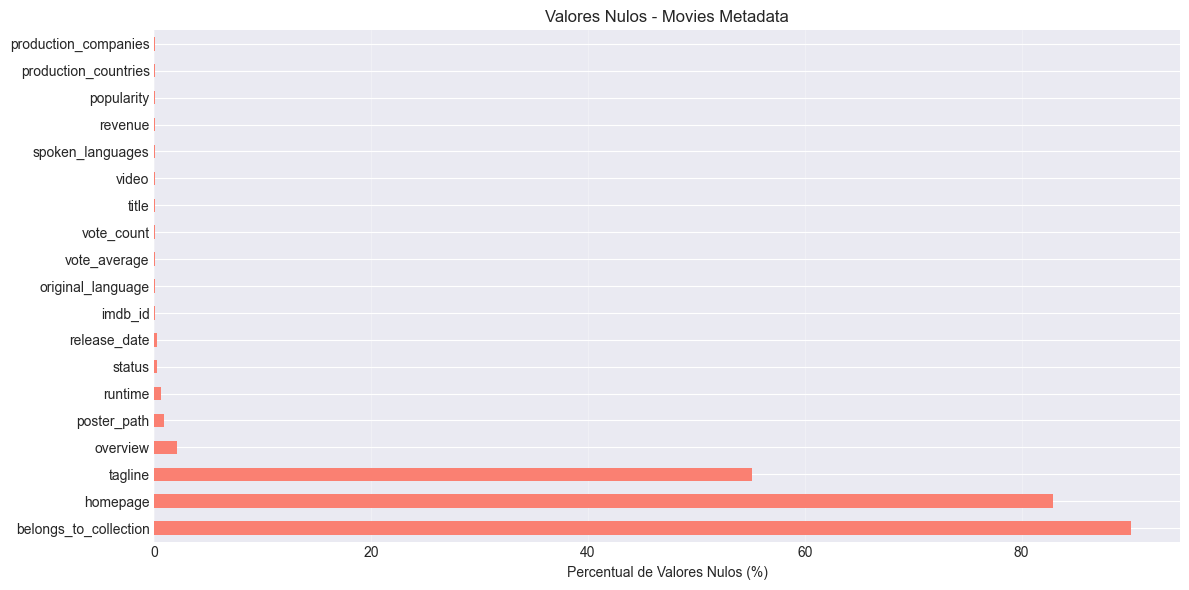

In [61]:
# Visualizar valores nulos
plot_null_analysis(movies_df, "Movies Metadata")

In [62]:
# Análise de colunas numéricas importantes
numeric_cols = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count', 'popularity']

print("📊 ESTATÍSTICAS DESCRITIVAS - Colunas Numéricas")
print("="*80)
movies_df[numeric_cols].describe().T

📊 ESTATÍSTICAS DESCRITIVAS - Colunas Numéricas


,count,mean,std,min,25%,50%,75%,max
revenue,45460.0,1.120935e+07,6.433225e+07,0.0,0.0,0.0,0.0,2.787965e+09
runtime,45203.0,9.412820e+01,3.840781e+01,0.0,85.0,95.0,107.0,1.256000e+03
vote_average,45460.0,5.618207e+00,1.924216e+00,0.0,5.0,6.0,6.8,1.000000e+01
vote_count,45460.0,1.098973e+02,4.913104e+02,0.0,3.0,10.0,34.0,1.407500e+04


In [63]:
# Converter colunas numéricas para o tipo correto
movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors='coerce')
movies_df['revenue'] = pd.to_numeric(movies_df['revenue'], errors='coerce')
movies_df['runtime'] = pd.to_numeric(movies_df['runtime'], errors='coerce')
movies_df['vote_average'] = pd.to_numeric(movies_df['vote_average'], errors='coerce')
movies_df['vote_count'] = pd.to_numeric(movies_df['vote_count'], errors='coerce')
movies_df['popularity'] = pd.to_numeric(movies_df['popularity'], errors='coerce')

# Criar coluna de lucro e ROI
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']
movies_df['roi'] = ((movies_df['revenue'] - movies_df['budget']) / movies_df['budget'] * 100).round(2)

# Filtrar filmes com dados completos de budget e revenue
movies_complete = movies_df[(movies_df['budget'] > 0) & (movies_df['revenue'] > 0)].copy()

print(f"📈 Filmes com dados completos de Budget e Revenue: {len(movies_complete):,} de {len(movies_df):,}")
print(f"   Percentual: {len(movies_complete)/len(movies_df)*100:.2f}%")

📈 Filmes com dados completos de Budget e Revenue: 5,381 de 45,466
   Percentual: 11.84%


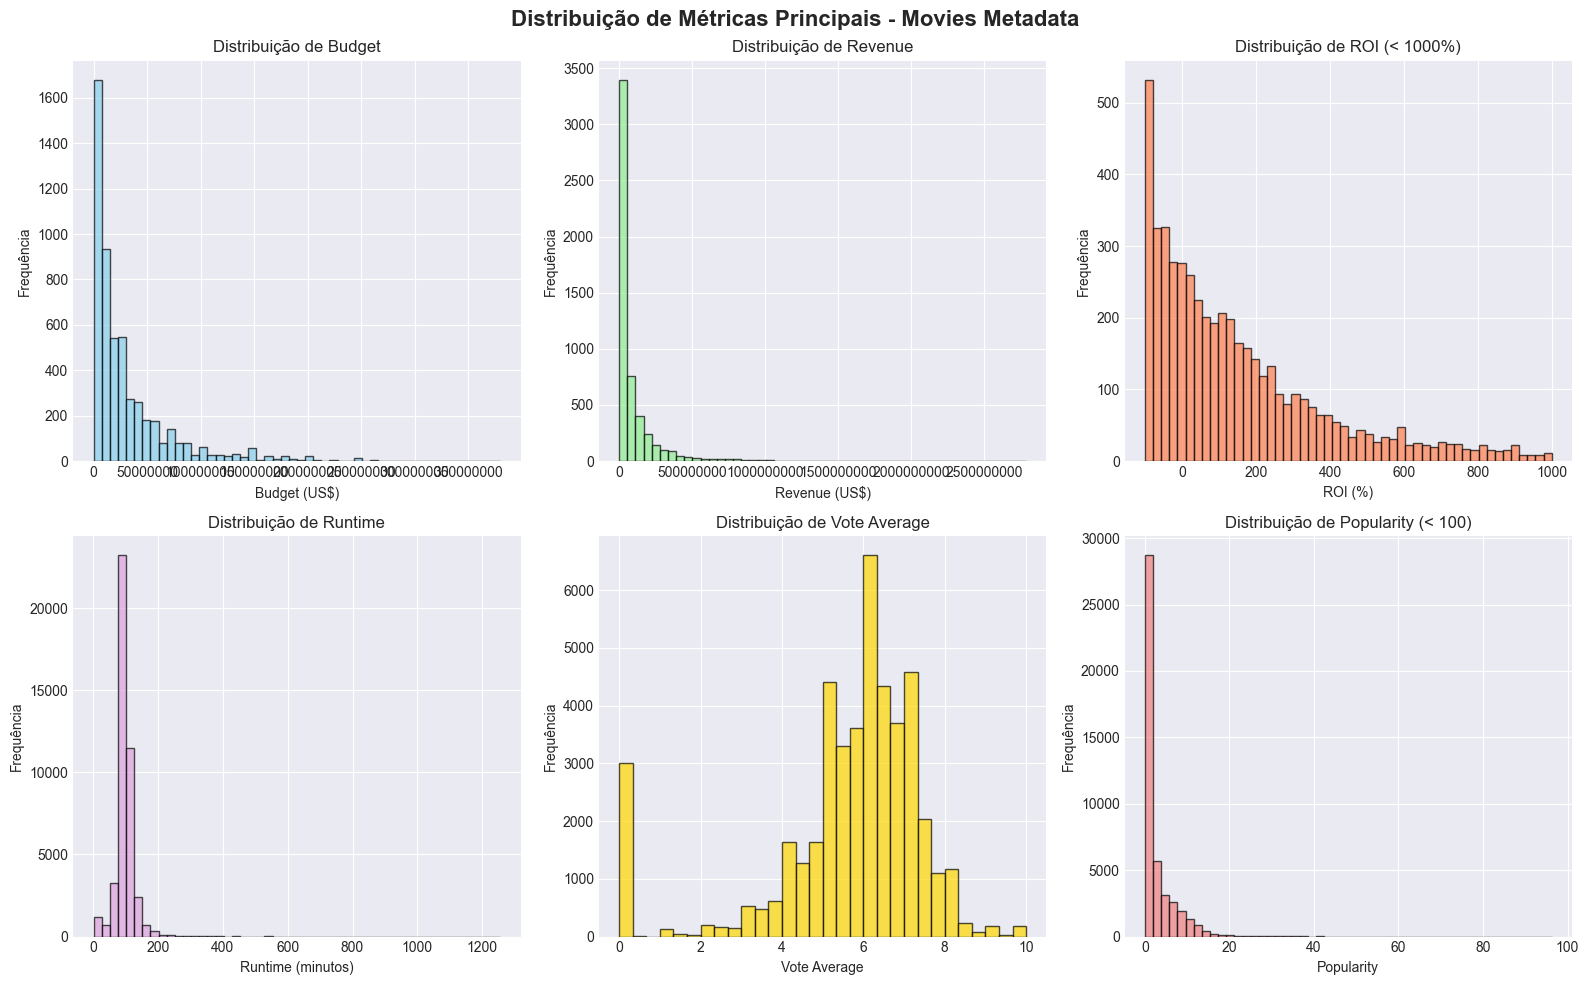

In [64]:
# Visualizações - Distribuições
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Distribuição de Métricas Principais - Movies Metadata', fontsize=16, fontweight='bold')

# Budget
axes[0, 0].hist(movies_complete['budget'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribuição de Budget')
axes[0, 0].set_xlabel('Budget (US$)')
axes[0, 0].set_ylabel('Frequência')
axes[0, 0].ticklabel_format(style='plain', axis='x')

# Revenue
axes[0, 1].hist(movies_complete['revenue'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distribuição de Revenue')
axes[0, 1].set_xlabel('Revenue (US$)')
axes[0, 1].set_ylabel('Frequência')
axes[0, 1].ticklabel_format(style='plain', axis='x')

# ROI
axes[0, 2].hist(movies_complete[movies_complete['roi'] < 1000]['roi'], bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[0, 2].set_title('Distribuição de ROI (< 1000%)')
axes[0, 2].set_xlabel('ROI (%)')
axes[0, 2].set_ylabel('Frequência')

# Runtime
axes[1, 0].hist(movies_df[movies_df['runtime'] > 0]['runtime'], bins=50, color='plum', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Distribuição de Runtime')
axes[1, 0].set_xlabel('Runtime (minutos)')
axes[1, 0].set_ylabel('Frequência')

# Vote Average
axes[1, 1].hist(movies_df['vote_average'], bins=30, color='gold', edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Distribuição de Vote Average')
axes[1, 1].set_xlabel('Vote Average')
axes[1, 1].set_ylabel('Frequência')

# Popularity
axes[1, 2].hist(movies_df[movies_df['popularity'] < 100]['popularity'], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1, 2].set_title('Distribuição de Popularity (< 100)')
axes[1, 2].set_xlabel('Popularity')
axes[1, 2].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

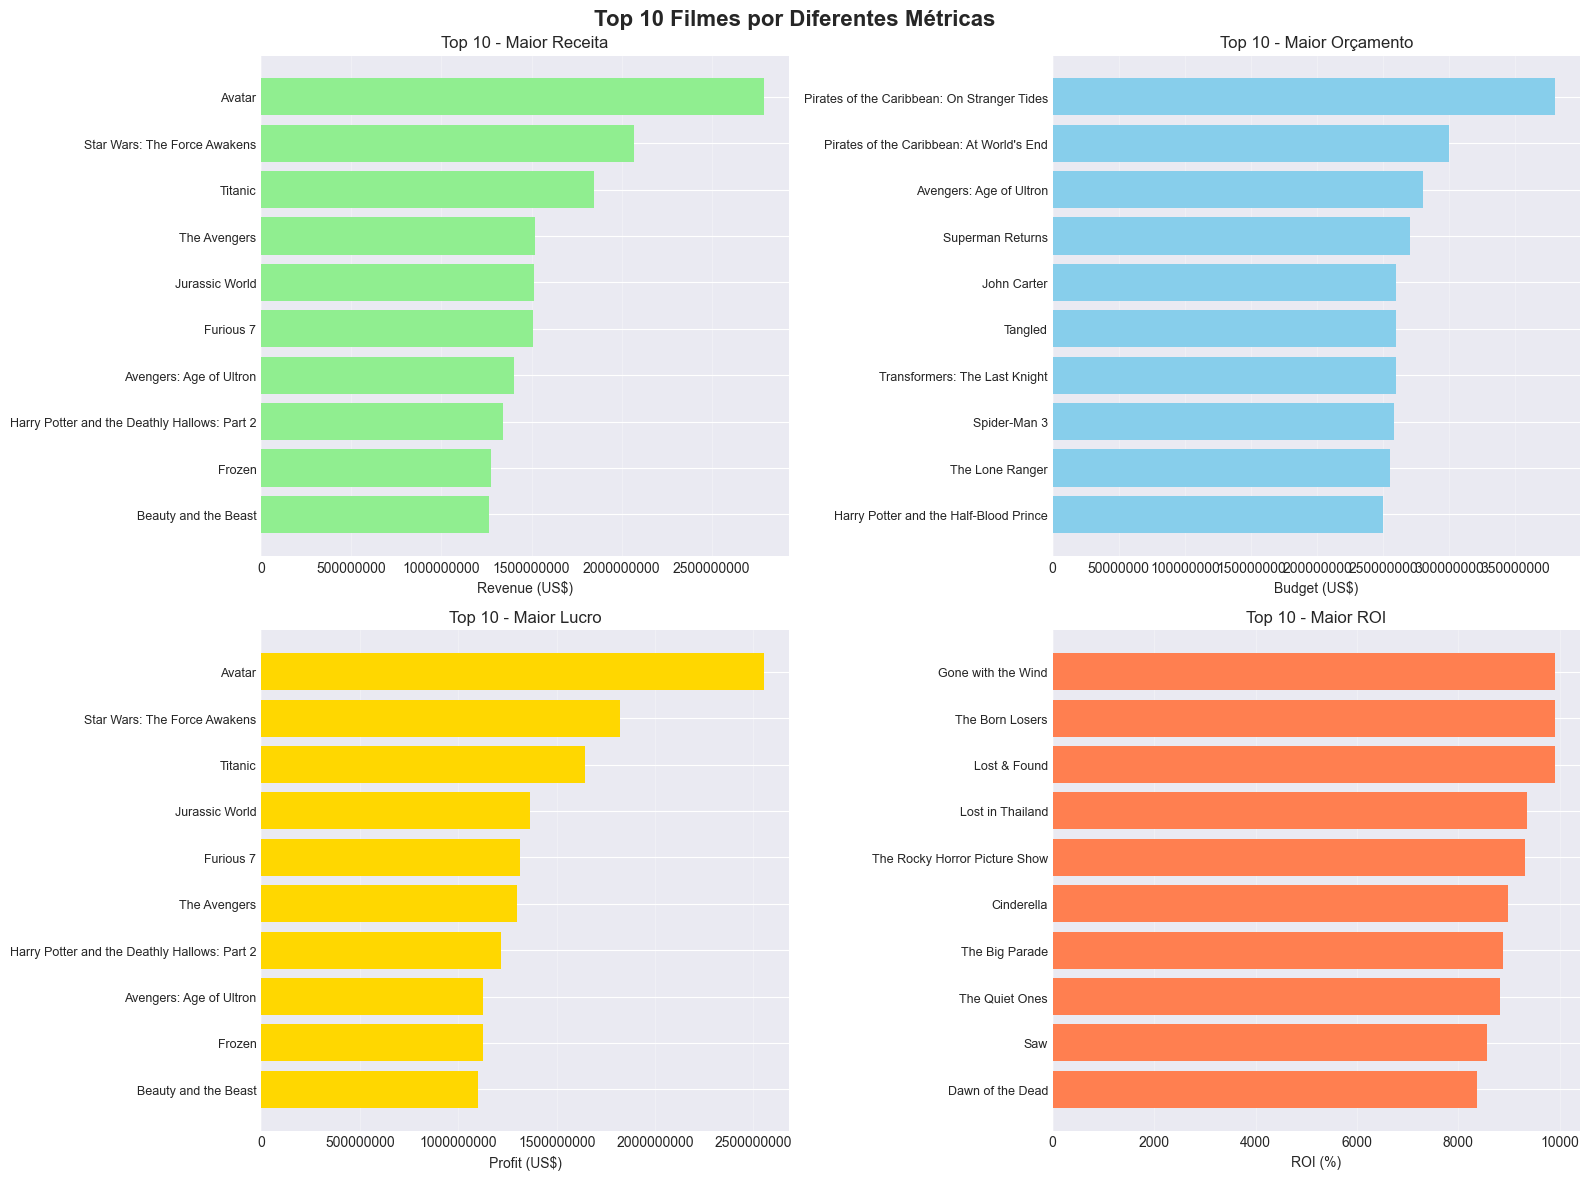

In [65]:
# Top 10 filmes por diferentes métricas
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Top 10 Filmes por Diferentes Métricas', fontsize=16, fontweight='bold')

# Top 10 por Revenue
top_revenue = movies_complete.nlargest(10, 'revenue')[['title', 'revenue']].sort_values('revenue')
axes[0, 0].barh(range(len(top_revenue)), top_revenue['revenue'], color='lightgreen')
axes[0, 0].set_yticks(range(len(top_revenue)))
axes[0, 0].set_yticklabels(top_revenue['title'], fontsize=9)
axes[0, 0].set_xlabel('Revenue (US$)')
axes[0, 0].set_title('Top 10 - Maior Receita')
axes[0, 0].ticklabel_format(style='plain', axis='x')
axes[0, 0].grid(axis='x', alpha=0.3)

# Top 10 por Budget
top_budget = movies_complete.nlargest(10, 'budget')[['title', 'budget']].sort_values('budget')
axes[0, 1].barh(range(len(top_budget)), top_budget['budget'], color='skyblue')
axes[0, 1].set_yticks(range(len(top_budget)))
axes[0, 1].set_yticklabels(top_budget['title'], fontsize=9)
axes[0, 1].set_xlabel('Budget (US$)')
axes[0, 1].set_title('Top 10 - Maior Orçamento')
axes[0, 1].ticklabel_format(style='plain', axis='x')
axes[0, 1].grid(axis='x', alpha=0.3)

# Top 10 por Profit
top_profit = movies_complete.nlargest(10, 'profit')[['title', 'profit']].sort_values('profit')
axes[1, 0].barh(range(len(top_profit)), top_profit['profit'], color='gold')
axes[1, 0].set_yticks(range(len(top_profit)))
axes[1, 0].set_yticklabels(top_profit['title'], fontsize=9)
axes[1, 0].set_xlabel('Profit (US$)')
axes[1, 0].set_title('Top 10 - Maior Lucro')
axes[1, 0].ticklabel_format(style='plain', axis='x')
axes[1, 0].grid(axis='x', alpha=0.3)

# Top 10 por ROI (filtrando valores extremos)
top_roi = movies_complete[movies_complete['roi'] < 10000].nlargest(10, 'roi')[['title', 'roi']].sort_values('roi')
axes[1, 1].barh(range(len(top_roi)), top_roi['roi'], color='coral')
axes[1, 1].set_yticks(range(len(top_roi)))
axes[1, 1].set_yticklabels(top_roi['title'], fontsize=9)
axes[1, 1].set_xlabel('ROI (%)')
axes[1, 1].set_title('Top 10 - Maior ROI')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

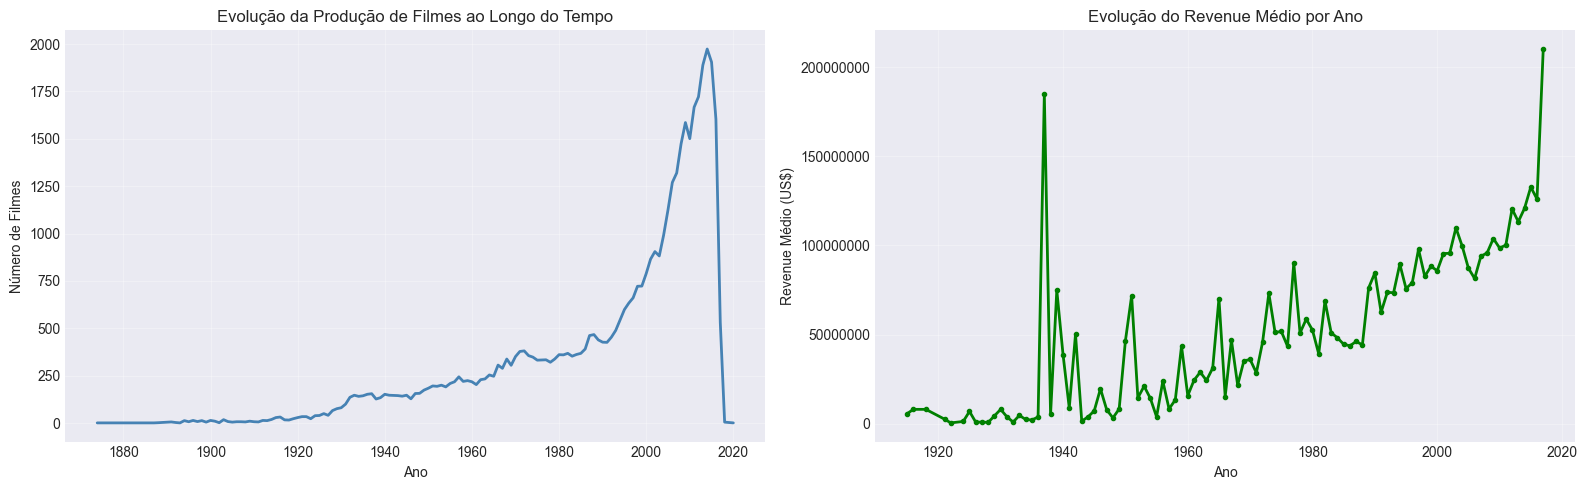

In [66]:
# Análise temporal - Extrair ano de release_date
movies_df['release_year'] = pd.to_datetime(movies_df['release_date'], errors='coerce').dt.year

# Atualizar movies_complete com a nova coluna
movies_complete['release_year'] = pd.to_datetime(movies_complete['release_date'], errors='coerce').dt.year

# Evolução de filmes por ano
movies_by_year = movies_df['release_year'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Número de filmes por ano
axes[0].plot(movies_by_year.index, movies_by_year.values, color='steelblue', linewidth=2)
axes[0].set_xlabel('Ano')
axes[0].set_ylabel('Número de Filmes')
axes[0].set_title('Evolução da Produção de Filmes ao Longo do Tempo')
axes[0].grid(alpha=0.3)

# Revenue médio por ano (filmes com dados completos)
revenue_by_year = movies_complete.groupby('release_year')['revenue'].mean()
axes[1].plot(revenue_by_year.index, revenue_by_year.values, color='green', linewidth=2, marker='o', markersize=3)
axes[1].set_xlabel('Ano')
axes[1].set_ylabel('Revenue Médio (US$)')
axes[1].set_title('Evolução do Revenue Médio por Ano')
axes[1].ticklabel_format(style='plain', axis='y')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

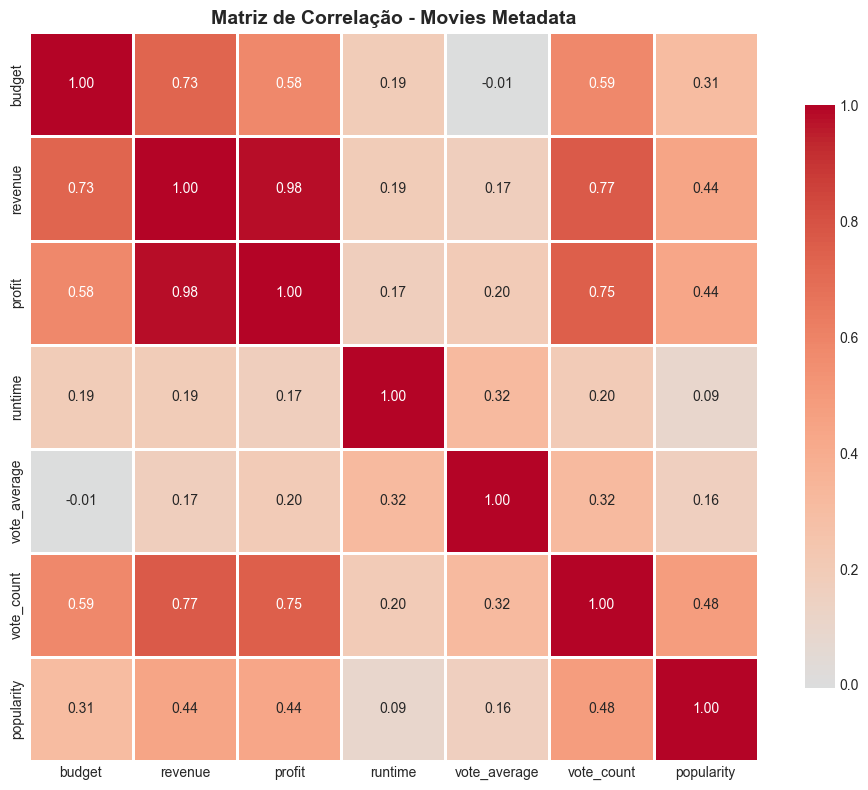

In [67]:
# Correlação entre variáveis numéricas
correlation_cols = ['budget', 'revenue', 'profit', 'runtime', 'vote_average', 'vote_count', 'popularity']
correlation_matrix = movies_complete[correlation_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Movies Metadata', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---
## 2️⃣ Análise: Credits
Dataset contendo informações sobre elenco e equipe dos filmes.

In [68]:
# Carregar dados de credits
credits_df = pd.read_csv(files['credits'])

# Análise geral
analyze_dataframe(credits_df, "CREDITS")

# Primeiras linhas
print("📄 Primeiras 3 linhas:")
credits_df.head(3)


📊 ANÁLISE: CREDITS

🔢 Dimensões: 45,476 linhas x 3 colunas
💾 Memória utilizada: 193.01 MB

📋 Tipos de dados:
object    2
int64     1
Name: count, dtype: int64

✅ Nenhum valor nulo encontrado!

🔄 Linhas duplicadas: 37 (0.08%)

📄 Primeiras 3 linhas:
🔄 Linhas duplicadas: 37 (0.08%)

📄 Primeiras 3 linhas:


,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602


In [69]:
# Analisar estrutura dos dados JSON em cast e crew
print("🎭 Exemplo de estrutura - CAST:")
print(credits_df['cast'].iloc[0][:200])
print("\n" + "="*80 + "\n")
print("🎬 Exemplo de estrutura - CREW:")
print(credits_df['crew'].iloc[0][:200])

🎭 Exemplo de estrutura - CAST:
[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'c


🎬 Exemplo de estrutura - CREW:
[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, 'job': 'Director', 'name': 'John Lasseter', 'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'}, {'credit


In [70]:
# Contar atores e membros da equipe por filme
def count_json_items(json_str):
    """Conta itens em uma string JSON"""
    try:
        return len(json.loads(json_str))
    except:
        return 0

credits_df['cast_count'] = credits_df['cast'].apply(count_json_items)
credits_df['crew_count'] = credits_df['crew'].apply(count_json_items)

print("📊 ESTATÍSTICAS - Tamanho de Elenco e Equipe")
print("="*80)
print(credits_df[['cast_count', 'crew_count']].describe().T)

📊 ESTATÍSTICAS - Tamanho de Elenco e Equipe
              count  mean  std  min  25%  50%  75%  max
cast_count  45476.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
crew_count  45476.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0


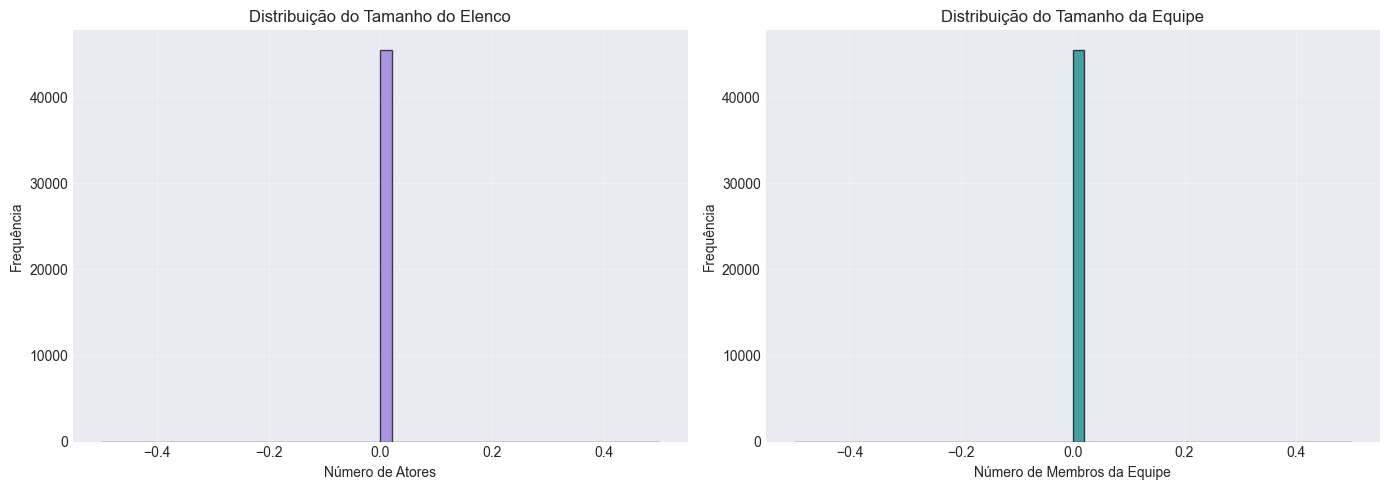

In [71]:
# Visualizações - Credits
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribuição de tamanho do elenco
axes[0].hist(credits_df['cast_count'], bins=50, color='mediumpurple', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Número de Atores')
axes[0].set_ylabel('Frequência')
axes[0].set_title('Distribuição do Tamanho do Elenco')
axes[0].grid(alpha=0.3)

# Distribuição de tamanho da equipe
axes[1].hist(credits_df['crew_count'], bins=50, color='teal', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Número de Membros da Equipe')
axes[1].set_ylabel('Frequência')
axes[1].set_title('Distribuição do Tamanho da Equipe')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

---
## 3️⃣ Análise: Ratings
Dataset contendo avaliações de usuários para os filmes.

In [72]:
# Carregar dados de ratings
ratings_df = pd.read_csv(files['ratings'])

# Análise geral
analyze_dataframe(ratings_df, "RATINGS")

# Primeiras linhas
print("📄 Primeiras 5 linhas:")
ratings_df.head()


📊 ANÁLISE: RATINGS

🔢 Dimensões: 26,024,289 linhas x 4 colunas
💾 Memória utilizada: 794.20 MB

📋 Tipos de dados:
int64      3
float64    1
Name: count, dtype: int64

✅ Nenhum valor nulo encontrado!

🔄 Linhas duplicadas: 0 (0.00%)

📄 Primeiras 5 linhas:
🔄 Linhas duplicadas: 0 (0.00%)

📄 Primeiras 5 linhas:


,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [73]:
# Estatísticas de ratings
print("📊 ESTATÍSTICAS - Ratings")
print("="*80)
print(ratings_df.describe().T)
print("\n")
print(f"👥 Total de usuários únicos: {ratings_df['userId'].nunique():,}")
print(f"🎬 Total de filmes avaliados: {ratings_df['movieId'].nunique():,}")
print(f"⭐ Total de avaliações: {len(ratings_df):,}")
print(f"📊 Média de avaliações por usuário: {len(ratings_df) / ratings_df['userId'].nunique():.2f}")
print(f"📊 Média de avaliações por filme: {len(ratings_df) / ratings_df['movieId'].nunique():.2f}")

📊 ESTATÍSTICAS - Ratings
                count          mean           std          min          25%  \
userId     26024289.0  1.350371e+05  7.817620e+04          1.0      67164.0   
movieId    26024289.0  1.584911e+04  3.108526e+04          1.0       1073.0   
rating     26024289.0  3.528090e+00  1.065443e+00          0.5          3.0   
timestamp  26024289.0  1.171258e+09  2.052889e+08  789652004.0  990754461.0   

                    50%           75%           max  
userId     1.351630e+05  2.026930e+05  2.708960e+05  
movieId    2.583000e+03  6.503000e+03  1.762750e+05  
rating     3.500000e+00  4.000000e+00  5.000000e+00  
timestamp  1.151716e+09  1.357578e+09  1.501830e+09  


                count          mean           std          min          25%  \
userId     26024289.0  1.350371e+05  7.817620e+04          1.0      67164.0   
movieId    26024289.0  1.584911e+04  3.108526e+04          1.0       1073.0   
rating     26024289.0  3.528090e+00  1.065443e+00          0.5        

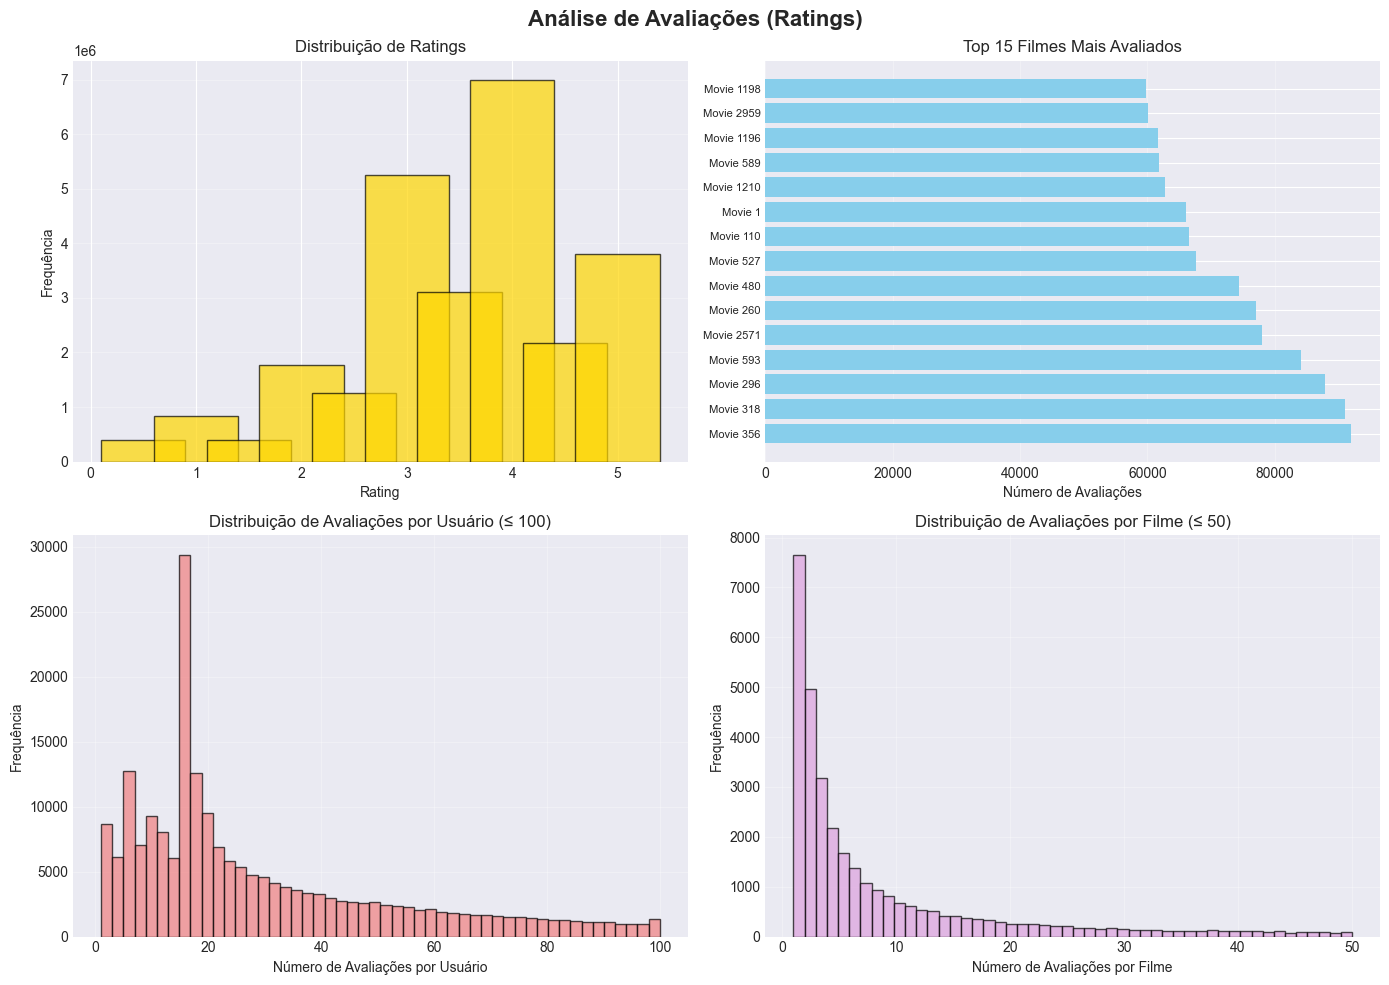

In [74]:
# Visualizações - Ratings
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Análise de Avaliações (Ratings)', fontsize=16, fontweight='bold')

# Distribuição de ratings
rating_counts = ratings_df['rating'].value_counts().sort_index()
axes[0, 0].bar(rating_counts.index, rating_counts.values, color='gold', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Frequência')
axes[0, 0].set_title('Distribuição de Ratings')
axes[0, 0].grid(axis='y', alpha=0.3)

# Top 15 filmes mais avaliados
top_rated_movies = ratings_df['movieId'].value_counts().head(15)
axes[0, 1].barh(range(len(top_rated_movies)), top_rated_movies.values, color='skyblue')
axes[0, 1].set_yticks(range(len(top_rated_movies)))
axes[0, 1].set_yticklabels([f'Movie {mid}' for mid in top_rated_movies.index], fontsize=8)
axes[0, 1].set_xlabel('Número de Avaliações')
axes[0, 1].set_title('Top 15 Filmes Mais Avaliados')
axes[0, 1].grid(axis='x', alpha=0.3)

# Distribuição de avaliações por usuário
ratings_per_user = ratings_df.groupby('userId').size()
axes[1, 0].hist(ratings_per_user[ratings_per_user <= 100], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Número de Avaliações por Usuário')
axes[1, 0].set_ylabel('Frequência')
axes[1, 0].set_title('Distribuição de Avaliações por Usuário (≤ 100)')
axes[1, 0].grid(alpha=0.3)

# Distribuição de avaliações por filme
ratings_per_movie = ratings_df.groupby('movieId').size()
axes[1, 1].hist(ratings_per_movie[ratings_per_movie <= 50], bins=50, color='plum', edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Número de Avaliações por Filme')
axes[1, 1].set_ylabel('Frequência')
axes[1, 1].set_title('Distribuição de Avaliações por Filme (≤ 50)')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

---
## 4️⃣ Análise: Keywords
Dataset contendo palavras-chave associadas aos filmes.

In [75]:
# Carregar dados de keywords
keywords_df = pd.read_csv(files['keywords'])

# Análise geral
analyze_dataframe(keywords_df, "KEYWORDS")

# Primeiras linhas
print("📄 Primeiras 3 linhas:")
keywords_df.head(3)


📊 ANÁLISE: KEYWORDS

🔢 Dimensões: 46,419 linhas x 2 colunas
💾 Memória utilizada: 8.10 MB

📋 Tipos de dados:
int64     1
object    1
Name: count, dtype: int64

✅ Nenhum valor nulo encontrado!

🔄 Linhas duplicadas: 987 (2.13%)

📄 Primeiras 3 linhas:


,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."


In [76]:
# Analisar estrutura das keywords
print("🔑 Exemplo de estrutura - KEYWORDS:")
print(keywords_df['keywords'].iloc[0][:300])

# Contar keywords por filme
keywords_df['keywords_count'] = keywords_df['keywords'].apply(count_json_items)

print("\n📊 ESTATÍSTICAS - Número de Keywords por Filme")
print("="*80)
print(keywords_df['keywords_count'].describe())

🔑 Exemplo de estrutura - KEYWORDS:
[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy co

📊 ESTATÍSTICAS - Número de Keywords por Filme

📊 ESTATÍSTICAS - Número de Keywords por Filme
count    46419.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: keywords_count, dtype: float64
count    46419.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: keywords_count, dtype: float64


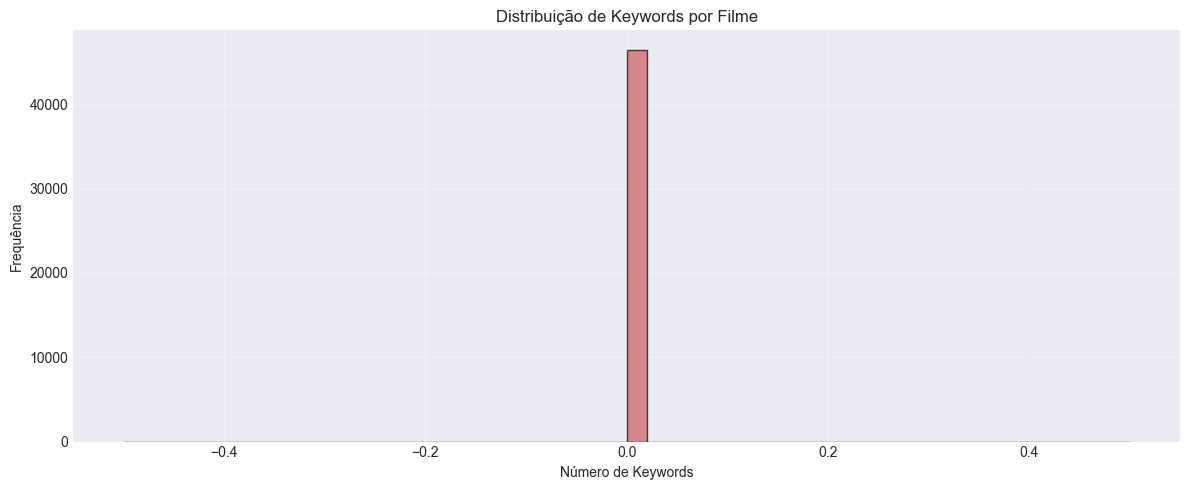

In [77]:
# Visualização - Keywords
plt.figure(figsize=(12, 5))
plt.hist(keywords_df['keywords_count'], bins=50, color='indianred', edgecolor='black', alpha=0.7)
plt.xlabel('Número de Keywords')
plt.ylabel('Frequência')
plt.title('Distribuição de Keywords por Filme')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

---
## 5️⃣ Análise: Links
Dataset contendo links externos (IMDB, TMDB) dos filmes.

In [78]:
# Carregar dados de links
links_df = pd.read_csv(files['links'])

# Análise geral
analyze_dataframe(links_df, "LINKS")

# Primeiras linhas
print("📄 Primeiras 5 linhas:")
links_df.head()


📊 ANÁLISE: LINKS

🔢 Dimensões: 45,843 linhas x 3 colunas
💾 Memória utilizada: 1.05 MB

📋 Tipos de dados:
int64      2
float64    1
Name: count, dtype: int64

⚠️  Valores nulos encontrados:
        Nulos  Percentual
tmdbId    219        0.48

🔄 Linhas duplicadas: 0 (0.00%)

📄 Primeiras 5 linhas:


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


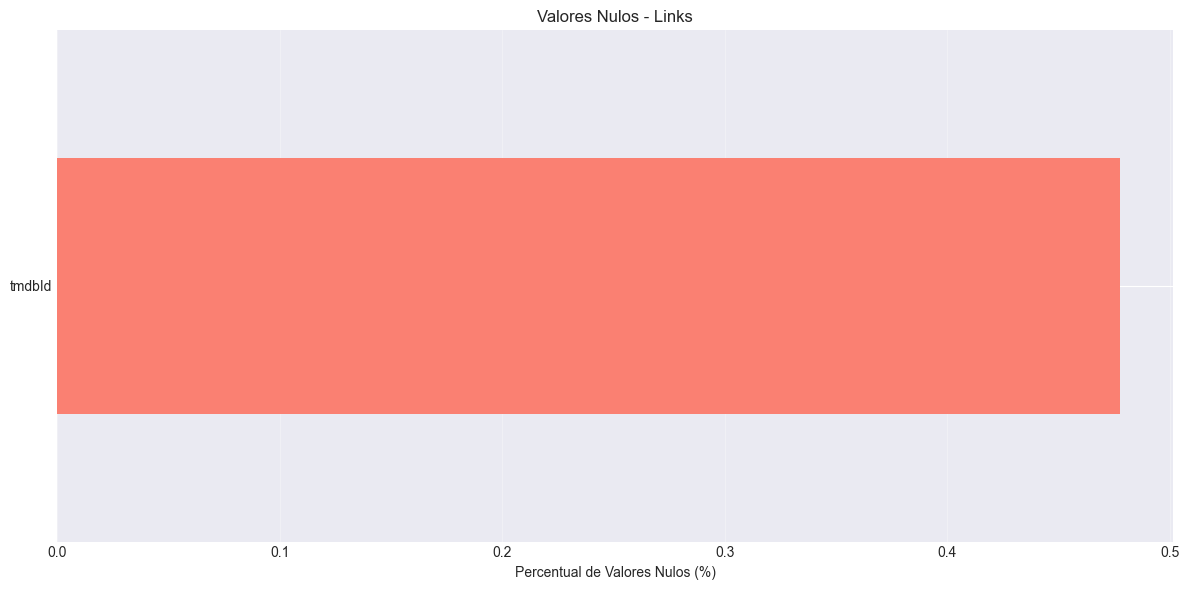

In [79]:
# Visualizar valores nulos
plot_null_analysis(links_df, "Links")

---
## 6️⃣ Análise Consolidada e Relacionamentos

In [80]:
# Resumo geral dos datasets
print("\n" + "="*80)
print("📋 RESUMO GERAL DOS DATASETS - CAMADA RAW")
print("="*80 + "\n")

datasets_summary = pd.DataFrame({
    'Dataset': ['Movies Metadata', 'Credits', 'Ratings', 'Keywords', 'Links'],
    'Linhas': [len(movies_df), len(credits_df), len(ratings_df), len(keywords_df), len(links_df)],
    'Colunas': [movies_df.shape[1], credits_df.shape[1], ratings_df.shape[1], keywords_df.shape[1], links_df.shape[1]],
    'Memória (MB)': [
        movies_df.memory_usage(deep=True).sum() / 1024**2,
        credits_df.memory_usage(deep=True).sum() / 1024**2,
        ratings_df.memory_usage(deep=True).sum() / 1024**2,
        keywords_df.memory_usage(deep=True).sum() / 1024**2,
        links_df.memory_usage(deep=True).sum() / 1024**2
    ]
})

datasets_summary['Linhas'] = datasets_summary['Linhas'].apply(lambda x: f"{x:,}")
datasets_summary['Memória (MB)'] = datasets_summary['Memória (MB)'].round(2)

print(datasets_summary.to_string(index=False))
print("\n" + "="*80)


📋 RESUMO GERAL DOS DATASETS - CAMADA RAW

        Dataset     Linhas  Colunas  Memória (MB)
Movies Metadata     45,466       27         71.84
        Credits     45,476        5        256.34
        Ratings 26,024,289        4        794.20
       Keywords     46,419        3          8.51
          Links     45,843        3          1.05

        Dataset     Linhas  Colunas  Memória (MB)
Movies Metadata     45,466       27         71.84
        Credits     45,476        5        256.34
        Ratings 26,024,289        4        794.20
       Keywords     46,419        3          8.51
          Links     45,843        3          1.05



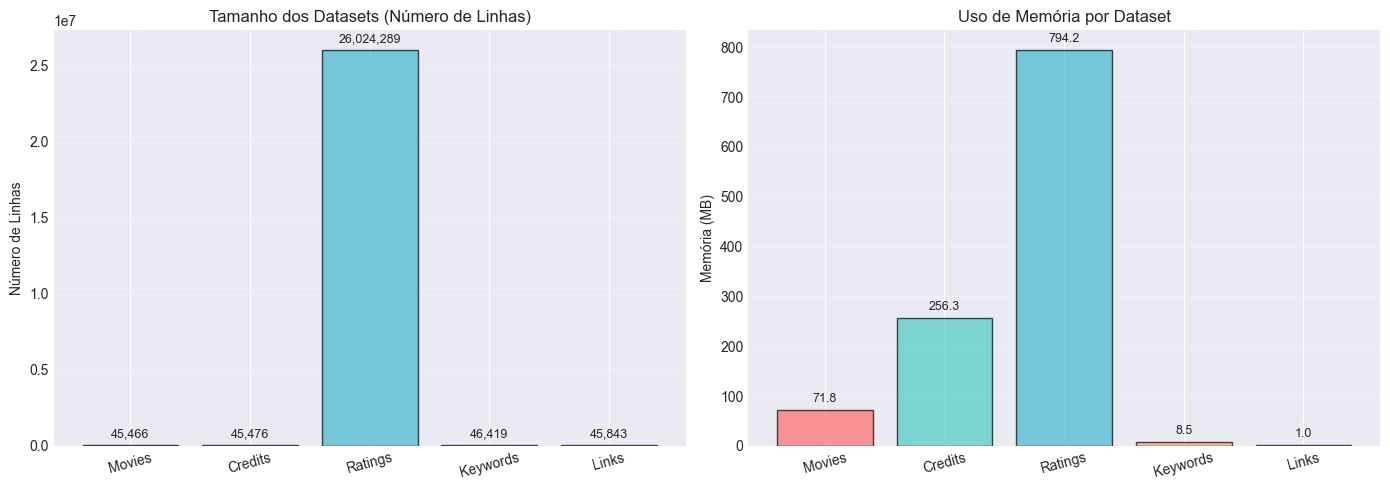

In [81]:
# Visualização comparativa dos datasets
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Número de linhas por dataset
datasets = ['Movies', 'Credits', 'Ratings', 'Keywords', 'Links']
row_counts = [len(movies_df), len(credits_df), len(ratings_df), len(keywords_df), len(links_df)]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']

axes[0].bar(datasets, row_counts, color=colors, edgecolor='black', alpha=0.7)
axes[0].set_ylabel('Número de Linhas')
axes[0].set_title('Tamanho dos Datasets (Número de Linhas)')
axes[0].tick_params(axis='x', rotation=15)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(row_counts):
    axes[0].text(i, v + max(row_counts)*0.02, f'{v:,}', ha='center', fontsize=9)

# Memória utilizada por dataset
memory_usage = [
    movies_df.memory_usage(deep=True).sum() / 1024**2,
    credits_df.memory_usage(deep=True).sum() / 1024**2,
    ratings_df.memory_usage(deep=True).sum() / 1024**2,
    keywords_df.memory_usage(deep=True).sum() / 1024**2,
    links_df.memory_usage(deep=True).sum() / 1024**2
]

axes[1].bar(datasets, memory_usage, color=colors, edgecolor='black', alpha=0.7)
axes[1].set_ylabel('Memória (MB)')
axes[1].set_title('Uso de Memória por Dataset')
axes[1].tick_params(axis='x', rotation=15)
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(memory_usage):
    axes[1].text(i, v + max(memory_usage)*0.02, f'{v:.1f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

---
## 🎯 Conclusões e Próximos Passos

### ✅ Principais Descobertas:

**Movies Metadata:**
- Dataset principal com informações detalhadas dos filmes
- Muitos valores nulos em colunas importantes (budget, revenue, runtime)
- Forte correlação entre budget e revenue
- Dados temporais permitem análise de tendências ao longo do tempo

**Credits:**
- Dados em formato JSON (necessário parsing na camada Silver)
- Informações de elenco e equipe disponíveis
- Variação grande no tamanho de elencos e equipes

**Ratings:**
- Grande volume de avaliações de usuários
- Distribuição de ratings concentrada em valores mais altos (3.5-4.0)
- Permite análise de popularidade e qualidade percebida

**Keywords:**
- Palavras-chave em formato JSON
- Útil para análise de temas e categorização

**Links:**
- IDs externos (IMDB, TMDB) para integração
- Alguns valores nulos em tmdbId

### 📋 Próximos Passos para Camada Silver:

1. **Limpeza de Dados:**
   - Tratar valores nulos (estratégias por coluna)
   - Remover duplicatas
   - Corrigir tipos de dados

2. **Transformações:**
   - Parsing de colunas JSON (genres, production_companies, keywords, cast, crew)
   - Normalização de dados
   - Criação de colunas derivadas (profit, ROI, decade)

3. **Integração:**
   - Relacionar datasets usando IDs comuns
   - Criar chaves primárias e estrangeiras
   - Validar integridade referencial

4. **Enriquecimento:**
   - Extrair informações de diretores e atores principais
   - Categorizar filmes por faixas de orçamento e receita
   - Criar dimensão temporal completa